In [2]:
import numpy as np
import xarray as xr
import pandas as pd 
import matplotlib.pyplot as plt
import datetime as datetime

In [3]:
ocean_data=xr.open_dataset("/Users/loganknudsen/Documents/UMD_Research_Local_File_Saves/psi_base_test_ocng_w_b.nc") #i=103

In [4]:
f = 2*(7.292115*10**(-5)*np.sin(np.pi/4))

In [5]:
tf =int(5*2*np.pi/(2*(7.292115*10**(-5)*np.sin(np.pi/4))))*10**(8) #314159
tf2 = int(2*2*np.pi/(2*(7.292115*10**(-5)*np.sin(np.pi/4))))*10**(8)
dt = 2*np.pi/(2*(7.292115*10**(-5)*np.sin(np.pi/4)))*10**(8)
print(tf2)

12185400000000


In [6]:
ocean_data.time[40]

<xarray.DataArray 'time' ()>
array(121854439710794, dtype='timedelta64[ns]')
Coordinates:
    time     timedelta64[ns] 1 days 09:50:54.439710794
Attributes:
    longname:  Time

In [7]:
# dot_prod = np.square((ocean_data["u"])).mean(dim=["yC","zC"])+np.square((ocean_data["v"])).mean(dim=["yF","zC"])
dot_prod = np.square((ocean_data["u"])).mean(dim=["yC","zC"])+np.square((ocean_data["v"])).mean(dim=["yF","zC"])+np.square(ocean_data["w"]).mean(dim=["yC","zF"])

KE = 0.5*dot_prod
KE5 = KE.isel(time=103)
dta = KE/KE5

In [8]:
dta.coords['time_norm'] = dta.time*(f/(2*np.pi))
dta = dta.swap_dims({'time':'time_norm'})

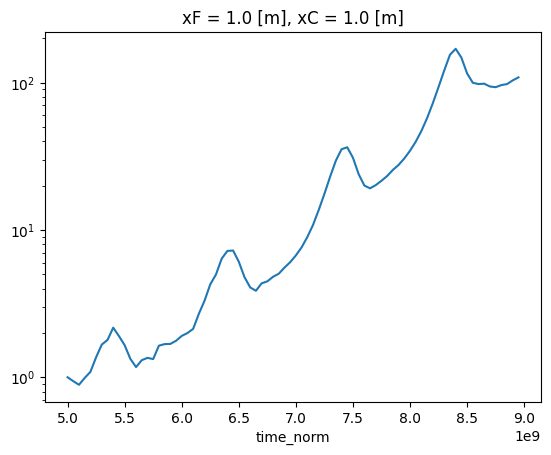

In [9]:
# dt = dta.isel(time=[103,105])
fig = plt.figure()
axs = fig.add_subplot(1, 1, 1)
dtb = dta.isel(time_norm=slice(103,187))
dtb.plot(ax=axs)
axs.set_yscale("log")

In [10]:
f = 2*(7.292115e-5)*np.sin(np.pi/4)
B = (ocean_data.N2)**(1/2)
N = B
mean_N= N.mean(dim=["yC","zC"])
N_f = mean_N/f
N_f.coords['time_norm'] = N_f.time*(f/(2*np.pi))
N_f = N_f.swap_dims({'time':'time_norm'})
N_f = N_f.isel(time_norm=slice(0,40))

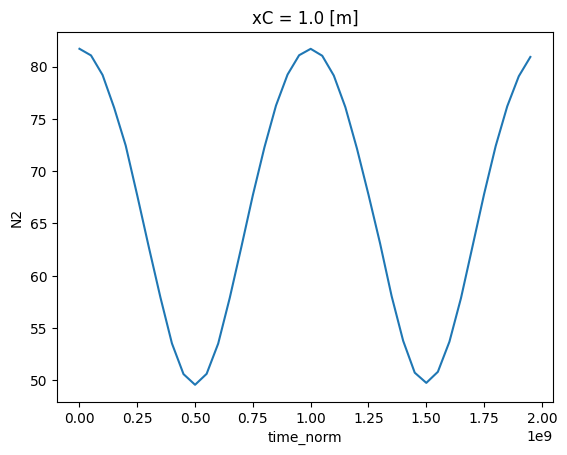

In [11]:
N_f.plot()

In [12]:
gamma = 0.6
S_2 = (7.7*f)**2
phi = 0
u_ag_shear =  gamma*(S_2/f)*np.cos(phi)
v_ag_shear =  gamma*(S_2/f)*np.sin(phi)
AGSP=-1*(ocean_data.u).mean(dim=["yC","zC"])*(ocean_data.w).mean(dim=["yC","zF"])*u_ag_shear-(ocean_data.v).mean(dim=["yF","zC"])*(ocean_data.w).mean(dim=["yC","zF"])*v_ag_shear

In [12]:
ocean_data

<xarray.Dataset>
Dimensions:  (zC: 200, zF: 201, xC: 1, yF: 1024, xF: 1, yC: 1024, time: 412)
Coordinates:
  * zC       (zC) float64 -199.5 -198.5 -197.5 -196.5 ... -3.5 -2.5 -1.5 -0.5
  * zF       (zF) float64 -200.0 -199.0 -198.0 -197.0 ... -3.0 -2.0 -1.0 0.0
  * xC       (xC) float64 1.0
  * yF       (yF) float64 0.0 2.93 5.859 8.789 ... 2.991e+03 2.994e+03 2.997e+03
  * xF       (xF) float64 1.0
  * yC       (yC) float64 1.465 4.395 7.324 ... 2.993e+03 2.996e+03 2.999e+03
  * time     (time) timedelta64[ns] 00:00:00 ... 14 days 01:38:18.036115166
Data variables:
    v        (time, zC, yF, xC) float64 -2.389e-05 -4.484e-05 ... -0.214 -0.2114
    B        (time, zC, yC, xC) float64 ...
    U        (time, zC, yC, xF) float64 ...
    w        (time, zF, yC, xC) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    b        (time, zC, yC, xC) float64 ...
    V        (time, zC, yF, xC) float64 ...
    u        (time, zC, yC, xF) float64 7.476e-06 -0.0001321 ... -0.2133 -0.2124
    E        (time, zC, yC, xC) float64 ...
    N2       (time, zC, yC, xC) float64 7.099e-05 7.099e-05 ... 5.746e-05
Attributes:
    interval:              3046.3609927698385
    Oceananigans:          This file was generated using Oceananigans v0.87.0
    Julia:                 This file was generated using Julia Version 1.9.1\...
    output time interval:  Output was saved every 50.773 minutes.
    date:                  This file was generated on 2023-09-27T14:40:02.879.
    schedule:              TimeInterval

In [13]:
u = ocean_data.u + ocean_data.U
v = ocean_data.v + ocean_data.V
w = ocean_data.w
z = ocean_data.zC

In [14]:
u_s =  (u-u.mean(["zC"])).mean(dim=["yC","zC"])
v_s = (v-v.mean(["zC"])).mean(dim=["yF","zC"])
w_s = (w-w.mean("zF")).mean(dim=["yC","zF"])

In [15]:
K = 0.5*(np.square(u_s)+np.square(v_s)+np.square(w_s))

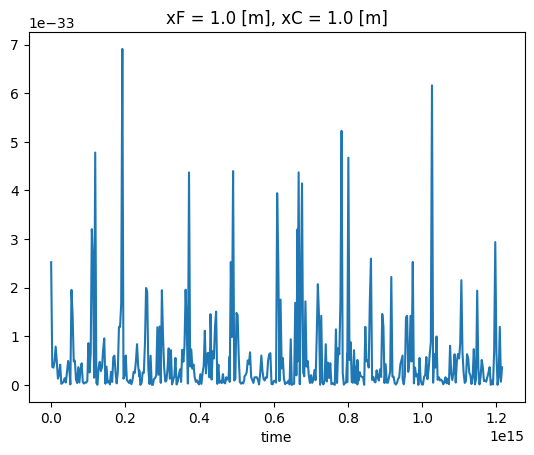

In [16]:
K.plot()

In [17]:
delta_T= np.gradient(AGSP.time)
AGSP.integrate("time",datetime_unit="s")

<xarray.DataArray (xF: 1, xC: 1)>
array([[2.72591506e-24]])
Coordinates:
  * xF       (xF) float64 1.0
  * xC       (xC) float64 1.0